In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline

# Business Understanding 

It is well understood that the cost to acquire new customers is significantly more expensive than the cost to keep current customers. Therefore, customer churn - the turnover rate of customers, is a crucial metric that organizations must seek to minimize. This is especially true now at the time of my analysis, January 2023,  due to rising interest rates and high inflation. The challenging economic environment forces customers to be even more selective about spending money and businesses will be under greater pressure. In order to minimize churn, organizations need to first gain a deep understanding of how customers feel about the products and services they offer and identify which customers are most at risk of leaving. Armed with those insights, the organization can then act strategically to keep their customers satisfied and reduce churn. 


# Data Understanding

For my analysis I used the SyriaTel dataset, which contains churn data for over 3,300 telecom customers. This dataset also contains customer attributes such as how much were they paying, how many minutes were used, did the customer have an international plan, and a number of other attributes as well.  My reason for building a predictive model is to solve what is known in data science as a classification problem. I want my model to learn from customer data and accurately classify future customers as falling into two binary groups:
Likely to 1.) Churn  2.) Not churn.  


In [3]:
# Importing data and viewing first 5 rows
df = pd.read_csv('data/syriatelcustomerchurn.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

# Exploratory Data Analysis & Data Cleaning

In [3]:
# Looking at the shape tells us the dataset contains 3333 rows and 21 columns
df.shape

(3333, 21)

In [4]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Replacing spaces with underscores in column titles

df.columns = df.columns.str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [5]:
# Checking for null values; we can see there are none
df.isna().sum()
print ("This dataset contains %d null values." % df.isna().sum().sum())

This dataset contains 0 null values.


In [6]:
# Dropping 'phone_number' column as it is a unique identifier irrelevant to this analysis

df = df.drop(columns = 'phone_number', axis=1)
df.shape

(3333, 20)

In [7]:
df.churn

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

In [8]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

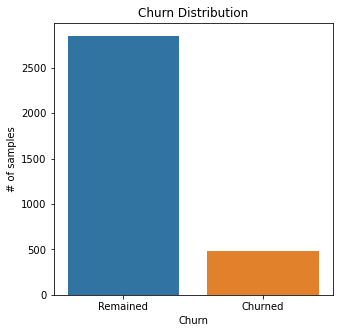

<Figure size 432x288 with 0 Axes>

In [9]:
# Checking the distribution of the target variable, 'churn'
churn_distribution = df["churn"].value_counts()

plt.figure(figsize=(5,5))
ax = sns.barplot(x = churn_distribution.index, y = churn_distribution.values)
ax.set(xlabel='Churn', ylabel='# of samples', title = 'Churn Distribution')
ax.set_xticklabels(["Remained", "Churned"])
plt.show()
plt.savefig('churndistribution2.jpg')

In [10]:
# Identifying the majority class
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

At roughly 85.5%, the majority class for our target, 'churn', is False. This means that roughly 85.5% of the samples in this dataset do not represent customer churn.


In [103]:
# Calculating churn rate
churn_rate = df.churn.value_counts(normalize=True)
print("Churn rate is %.2f%%." % (churn_rate[1] * 100))

Churn rate is 14.49%.


Analysis so far shows the dataset is disproportionate in that it has substanitally more samples of customers without churn than customers with churn. Churn rate of 14.49% implies a class imbalance for the target variable, which could introduce bias into a predicitve model. Oversampling techniques, such as SMOTE, will be introduced later to help account for this imbalance.

In [10]:
# Investigate sample statistics of numeric data
df.describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  customer_service_calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

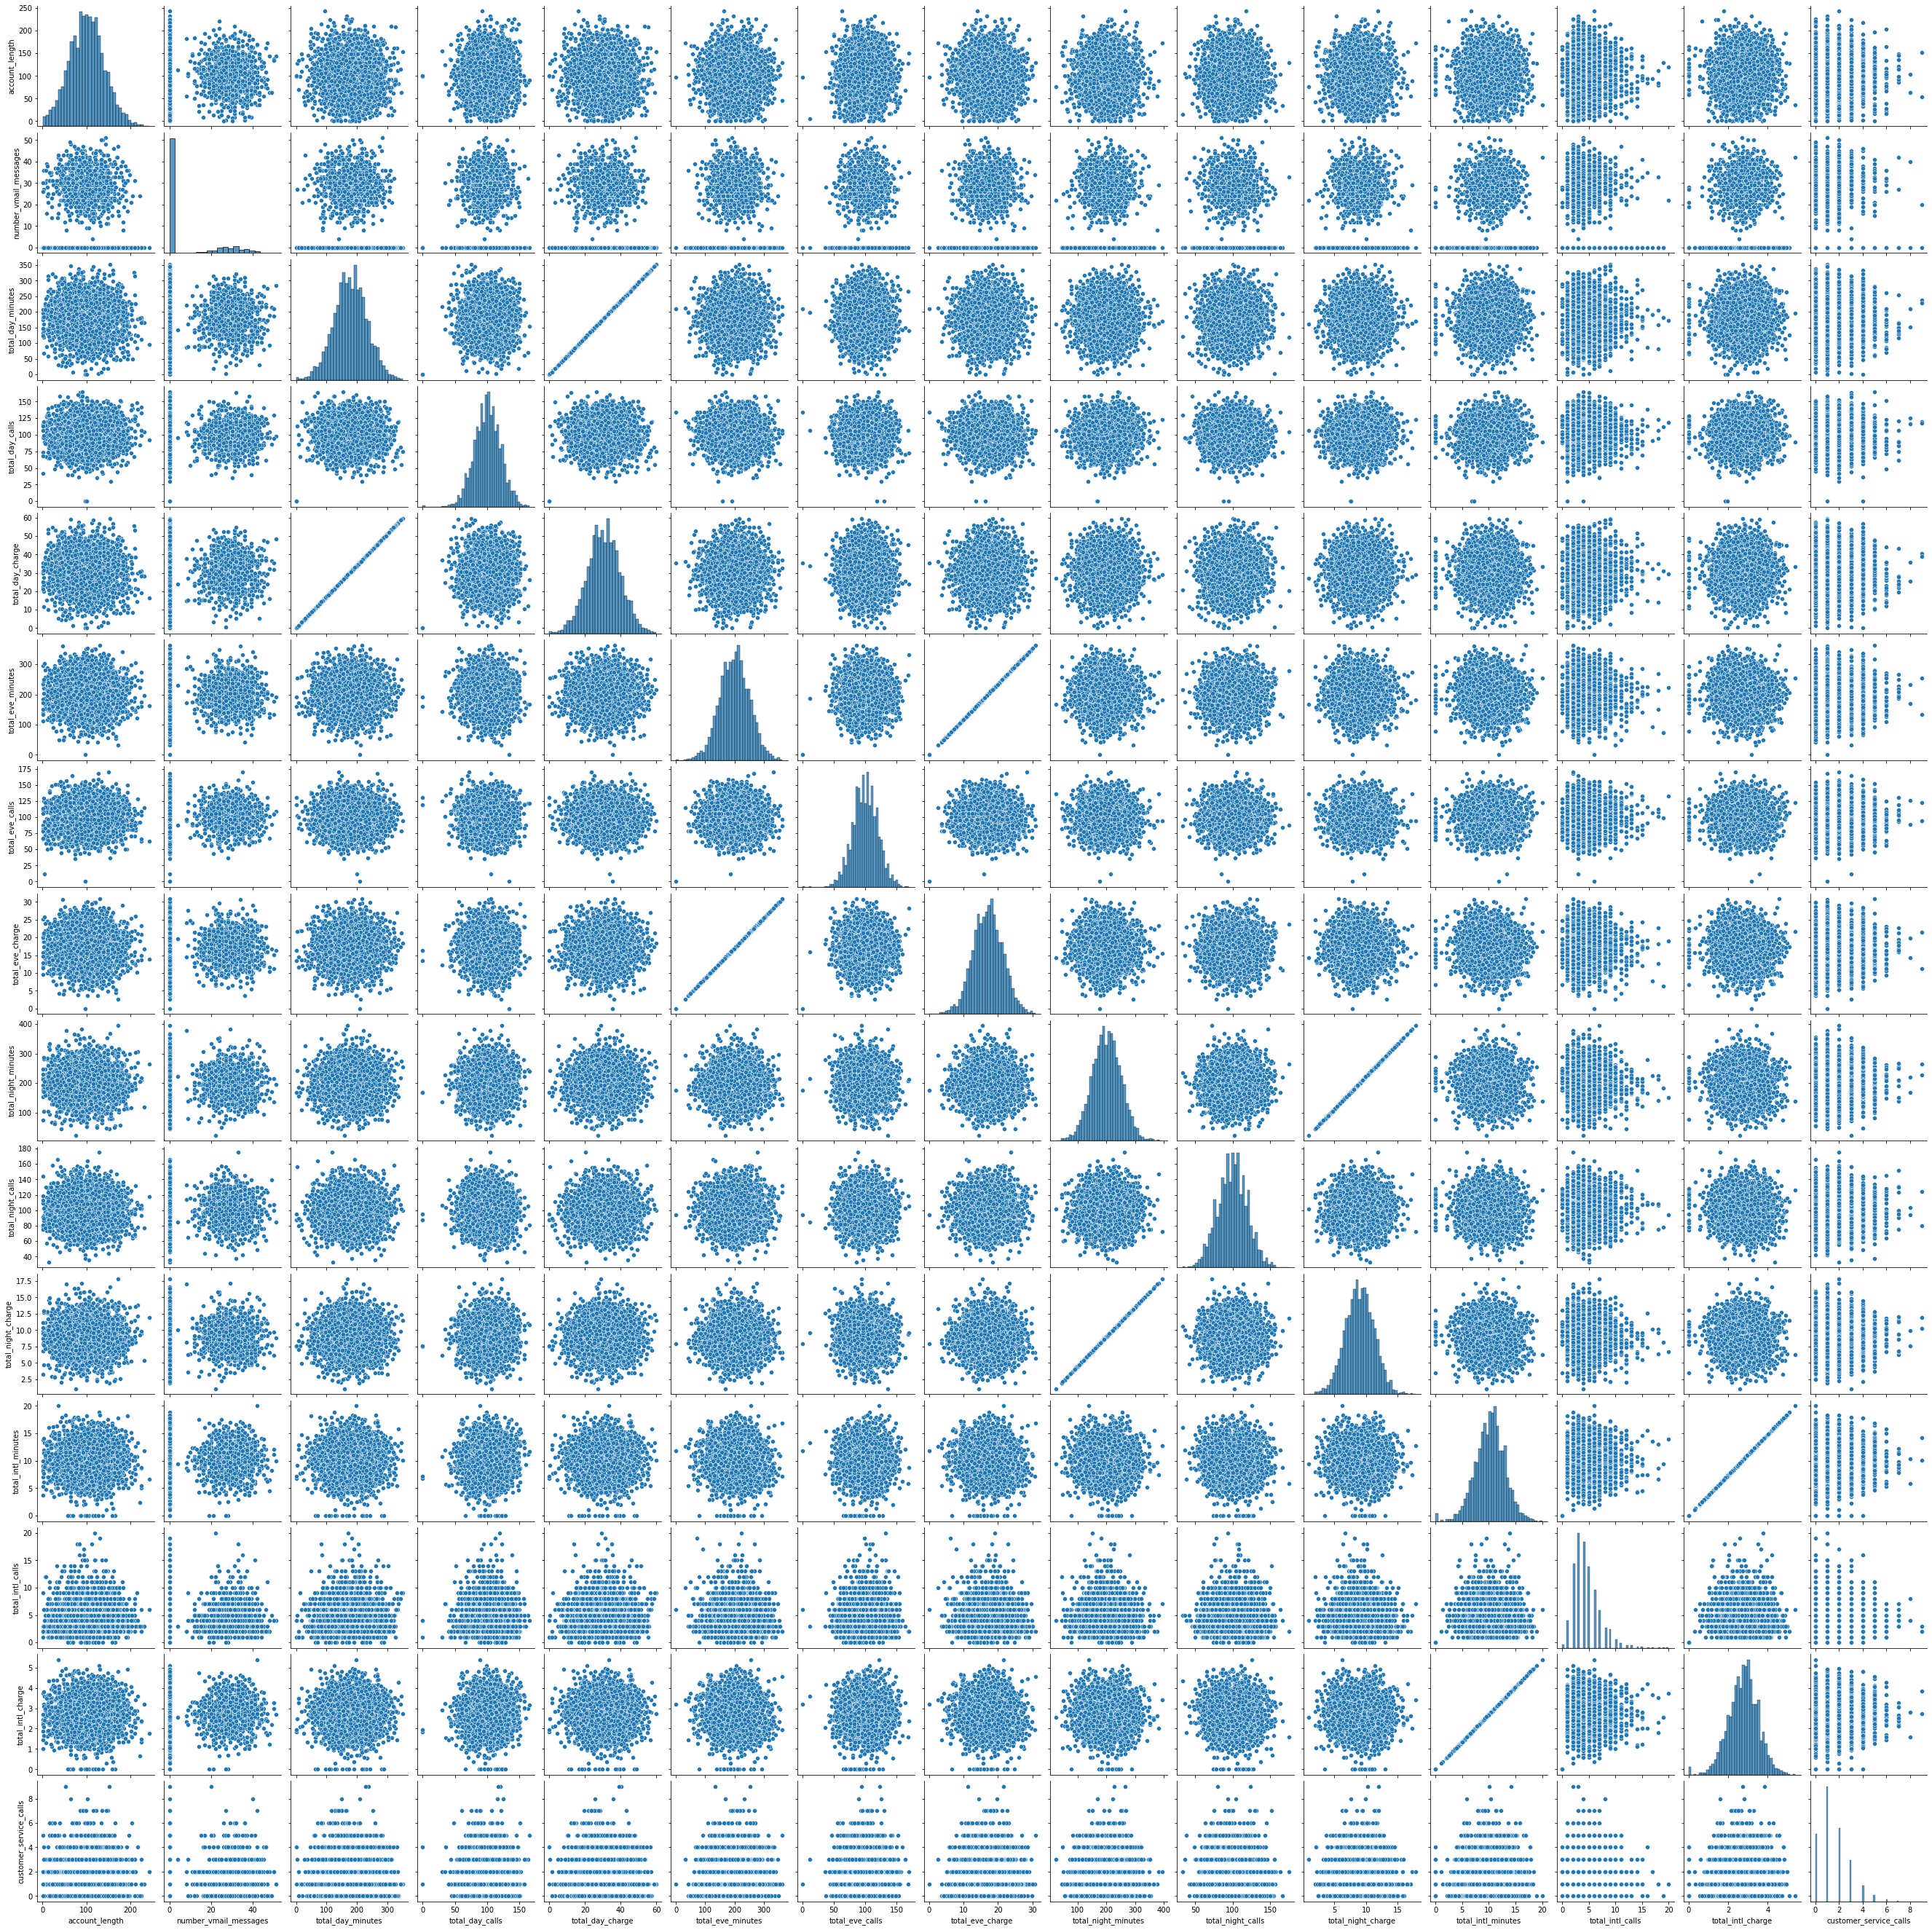

In [111]:
# Visualziing distribution of numeric data with pairplot
numeric_columns = df.select_dtypes(include = np.number)
sns.pairplot(numeric_columns)
plt.savefig('pairplot.jpg')

Analyzing the pairplot of the numerical columns shows us the data is normally distributed, with the exception of 'area_code' which appears to be categorical, as well as 'number_vmail_messages' which has a strong outlier at zero. As we might expect, there is a strong positive linear relationship between 'total_day_minutes' and 'total_day_charge'; 'total_eve_minutes' and 'total_eve_charge"; 'total_night_minutes' and 'total_night_charge'; 'total_intl_calls' and 'total_intl_charge'. This may present an opportunity for feature engineering later on.

In [12]:
# Transforming 'area_code' datatype from number to object
df.area_code = df.area_code.astype(object)

In [13]:
df.area_code

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area_code, Length: 3333, dtype: object

In [14]:
# Reassigning the 'numeric_columns' variable to exclude 'area_code'

numeric_columns = df.select_dtypes(include = np.number)
numeric_columns.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

I want to assign numeric data and categorical data to new objects in order to easily perform visualizations.

In [15]:
# Assign variable for categorical data
categorical_columns = df.select_dtypes(exclude = np.number)
categorical_columns

state area_code international_plan voice_mail_plan  churn
0       KS       415                 no             yes  False
1       OH       415                 no             yes  False
2       NJ       415                 no              no  False
3       OH       408                yes              no  False
4       OK       415                yes              no  False
...    ...       ...                ...             ...    ...
3328    AZ       415                 no             yes  False
3329    WV       415                 no              no  False
3330    RI       510                 no              no  False
3331    CT       510                yes              no  False
3332    TN       415                 no             yes  False

[3333 rows x 5 columns]

In [104]:
# Assinging 0 to customers who did not churn, and 1 to customers who did churn
#categorical_columns.churn = categorical_columns.churn.apply(lambda x: 0 if x==False else 1)

In [105]:
categorical_columns

state area_code international_plan voice_mail_plan  churn
0       KS       415                 no             yes      0
1       OH       415                 no             yes      0
2       NJ       415                 no              no      0
3       OH       408                yes              no      0
4       OK       415                yes              no      0
...    ...       ...                ...             ...    ...
3328    AZ       415                 no             yes      0
3329    WV       415                 no              no      0
3330    RI       510                 no              no      0
3331    CT       510                yes              no      0
3332    TN       415                 no             yes      0

[3333 rows x 5 columns]

In [22]:
# Plot 1 visualizes the question: 'For customers who had or did not have voicemail plans, how many churned vs. did not churn'
fig, ax = plt.subplots()

sns.countplot(x="voice_mail_plan", hue="churn", data=categorical_columns,
            palette={1:"red", 0:"blue"}, ax=ax)

ax.set_xlabel("Voicemail Plan")

color_patches = [
    Patch(facecolor="red", label="Churn"),
    Patch(facecolor="blue", label="No Churn")
]
ax.legend(handles=color_patches)

fig.suptitle("Voicemail Plan vs. Churn")
plt.savefig('vmp1.jpg')
plt.close()

#Plot 2 visualizes question from plot 1 but displays a proportion
vmp_counts_df = categorical_columns.groupby(["voice_mail_plan", "churn"])["churn"].count().unstack()
vmp_churn_percents_df = vmp_counts_df.T.div(vmp_counts_df.T.sum()).T
fig, ax = plt.subplots()

vmp_churn_percents_df.plot(kind="bar", stacked=True, color=["blue", "red"], ax=ax)

ax.set_xlabel("Voicemail Plan")
ax.set_xticklabels(['yes', 'no'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="No Churn"),
    Patch(facecolor="red", label="Churn")
]
ax.legend(handles=color_patches)

fig.suptitle("Voicemail Plan vs. Churn")
plt.savefig('vmp2.jpg')
plt.close()

# Plot 3 visualizes the question: 'For customers who churned vs. did not churn, how many had or did not have voicemail plans
fig, ax = plt.subplots()

sns.countplot(x="churn", hue="voice_mail_plan", data=categorical_columns,
            palette={'yes':"yellow", 'no':"orange",}, ax=ax)

ax.legend(title="Voicemail Plan")
ax.set_xticklabels(["No Churn", "Churn"])
ax.set_xlabel("")

fig.suptitle("Churn vs. Voicemail Plan");
plt.savefig('vmp3.jpg')
plt.close()

#Plot 4 visualizes question from plot 3 but displays a proportion
churn_vmp_percents_df = vmp_counts_df.div(vmp_counts_df.sum()).T
fig, ax = plt.subplots()

churn_vmp_percents_df.plot(kind="bar", stacked=True, color=["orange", "yellow"], ax=ax)

ax.legend(title="Voicemail Plan")
ax.set_xticklabels(["No Churn", "Churn"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Churn vs. Voicemail Plan")
plt.savefig('vmp4.jpg')
plt.close()

# Display all plots together by typing the following in markdown cell: **Voicemail Plan vs. Churn Count:** ![](vmp1.jpg)
#**Voicemail Plan vs. Churn Proportion:** ![](vmp2.jpg) **Churn vs. Voicemail Plan Count** ![](vmp3.jpg) 
#**Churn vs. Voicemail Plan Proportion:** ![](vmp4.jpg) 

**Voicemail Plan vs. Churn Count:** ![](vmp1.jpg)   **Voicemail Plan vs. Churn Proportion:** ![](vmp2.jpg) **Churn vs. Voicemail Plan Count** ![](vmp3.jpg)  **Churn vs. Voicemail Plan Proportion:** ![](vmp4.jpg)

Nothing in these charts strikes me as particularly noteworthy. 

In [23]:
# Plot 1 visualizes the question: 'For customers who had or did not have international plans, how many churned vs. did not churn'
fig, ax = plt.subplots()

sns.countplot(x="international_plan", hue="churn", data=categorical_columns,
            palette={1:"red", 0:"blue"}, ax=ax)

ax.set_xlabel("International Plan")

color_patches = [
    Patch(facecolor="red", label="Churn"),
    Patch(facecolor="blue", label="No Churn")
]
ax.legend(handles=color_patches)

fig.suptitle("International Plan vs. Churn");
plt.savefig('intlplan1.jpg')
plt.close()

#Plot 2 visualizes question from plot 1 but displays a proportion
intl_counts_df = categorical_columns.groupby(["international_plan", "churn"])["churn"].count().unstack()
intl_churn_percents_df = intl_counts_df.T.div(intl_counts_df.T.sum()).T
fig, ax = plt.subplots()

intl_churn_percents_df.plot(kind="bar", stacked=True, color=["blue", "red"], ax=ax)
ax.set_xlabel("International Plan")
ax.set_xticklabels(['yes', 'no'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="No Churn"),
    Patch(facecolor="red", label="Churn")
]
ax.legend(handles=color_patches)

fig.suptitle("International Plan vs. Churn")
plt.savefig('intlplan2.jpg')
plt.close()

# Plot 3 visualizes the question: 'For customers who churned vs. did not churn, how many had or did not have international plans
fig, ax = plt.subplots()

sns.countplot(x="churn", hue="international_plan", data=categorical_columns,
            palette={'yes':"yellow", 'no':"orange",}, ax=ax)

ax.legend(title="International Plan")
ax.set_xticklabels(["No Churn", "Churn"])
ax.set_xlabel("")

fig.suptitle("Churn vs. International Plan");
plt.savefig('intlplan3.jpg')
plt.close()

#Plot 4 visualizes question from plot 3 but displays a proportion
intl_churn_percents_df = intl_counts_df.div(intl_counts_df.sum()).T
fig, ax = plt.subplots()

intl_churn_percents_df.plot(kind="bar", stacked=True, color=["orange", "yellow"], ax=ax)

ax.legend(title="International Plan")
ax.set_xticklabels(["No Churn", "Churn"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Churn vs. International Plan")
plt.savefig('intlplan4.jpg')
plt.close()

# Display all plots together by typing the following in markdown cell: **International Plan vs. Churn Count:** ![](intlplan1.jpg)
#**International Plan vs. Churn Proportion:** ![](intlplan2.jpg) **Churn vs. International Plan Count** ![](intlplan3.jpg) 
#**Churn vs. Voicemail Plan Proportion:** ![](intlplan4.jpg) 

**International Plan vs. Churn Count:** ![](intlplan1.jpg)   **International Plan vs. Churn Proportion:** ![](intlplan2.jpg) **Churn vs. International Plan Count** ![](intlplan3.jpg)  **Churn vs. International Plan Proportion:** ![](intlplan4.jpg) 

The chart that stands out the most to me is the proportion of churn given customers who had or did not have an international plan. For customers who had an international plan vs those who did not, the percentage churn appears to be decreased by roughly 30%. This tells me that the international plan might be a popular product.

In [25]:
numeric_columns

account_length  number_vmail_messages  total_day_minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
3328             192                     36              156.2   
3329              68                      0              231.1   
3330              28                      0              180.8   
3331             184                      0              213.8   
3332              74                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  
0                  2.70                       1  
1                  3.70                       1  
2                  3.29                       0  
3                  1.78                       2  
4                  2.73                       3  
...                 ...                     ...  
3328               2.67                       2  
3329               2.59                       3  
3330               3.81                       2  
3331               1.35                       2  
3332               3.70                       0  

[3333 rows x 15 columns]

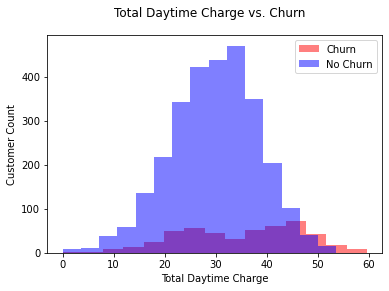

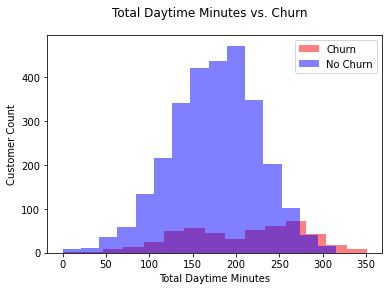

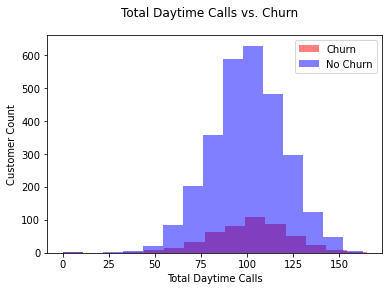

In [26]:
# Histograms for numeric daytime attributes vs. churn
fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_day_charge"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_day_charge"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Daytime Charge")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Daytime Charge vs. Churn")

ax.legend();



fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_day_minutes"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_day_minutes"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Daytime Minutes")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Daytime Minutes vs. Churn")

ax.legend();


fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_day_calls"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_day_calls"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Daytime Calls")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Daytime Calls vs. Churn")

ax.legend();

As total daytime charge and minutes increase, churn starts to outpace no churn.

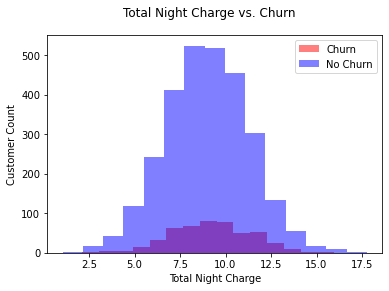

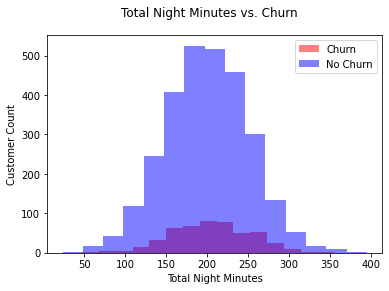

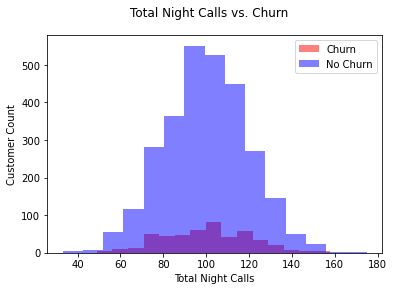

In [27]:
# Histograms for numeric night attributes vs. churn
fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_night_charge"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_night_charge"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Night Charge")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Night Charge vs. Churn")

ax.legend();



fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_night_minutes"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_night_minutes"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Night Minutes")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Night Minutes vs. Churn")

ax.legend();

fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_night_calls"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_night_calls"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Night Calls")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Night Calls vs. Churn")

ax.legend();

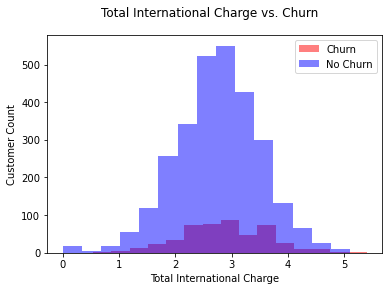

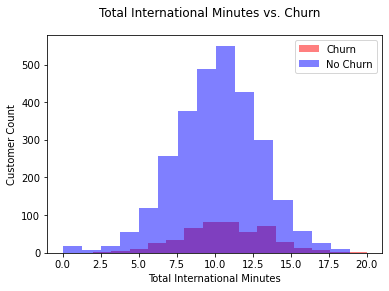

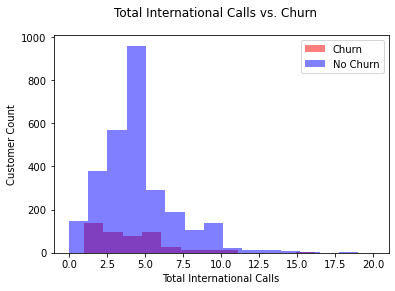

In [28]:
# Histograms for numeric international attributes vs. churn
fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_intl_charge"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_intl_charge"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total International Charge")
ax.set_ylabel("Customer Count")

fig.suptitle("Total International Charge vs. Churn")

ax.legend();



fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_intl_minutes"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_intl_minutes"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total International Minutes")
ax.set_ylabel("Customer Count")

fig.suptitle("Total International Minutes vs. Churn")

ax.legend();


fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["total_intl_calls"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["total_intl_calls"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total International Calls")
ax.set_ylabel("Customer Count")

fig.suptitle("Total International Calls vs. Churn")

ax.legend();

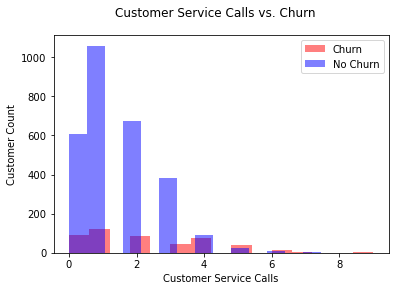

In [29]:
# Histogram for customer service calls vs. churn

fig, ax = plt.subplots()

ax.hist(df[df["churn"]==True]["customer_service_calls"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df[df["churn"]==False]["customer_service_calls"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Customer Service Calls")
ax.set_ylabel("Customer Count")

fig.suptitle("Customer Service Calls vs. Churn")

ax.legend();

# Feature Engineering

In [30]:
#Create copy of 'numeric_columns' dataframe for feature engineering
feature_engineered_numeric_columns = numeric_columns.copy()
feature_engineered_numeric_columns

account_length  number_vmail_messages  total_day_minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
3328             192                     36              156.2   
3329              68                      0              231.1   
3330              28                      0              180.8   
3331             184                      0              213.8   
3332              74                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  
0                  2.70                       1  
1                  3.70                       1  
2                  3.29                       0  
3                  1.78                       2  
4                  2.73                       3  
...                 ...                     ...  
3328               2.67                       2  
3329               2.59                       3  
3330               3.81                       2  
3331               1.35                       2  
3332               3.70                       0  

[3333 rows x 15 columns]

In [31]:
# Feature engineer by creating new columns that display the aggregate sum of minutes, calls, and charge and drop the original columns
column_minutes = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
column_calls = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'customer_service_calls']
column_charge = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']

feature_engineered_numeric_columns['total_agg_minutes'] = feature_engineered_numeric_columns[column_minutes].sum(axis=1)
feature_engineered_numeric_columns['total_agg_calls'] = feature_engineered_numeric_columns[column_calls].sum(axis=1)
feature_engineered_numeric_columns['total_agg_charge'] = feature_engineered_numeric_columns[column_charge].sum(axis=1)

feature_engineered_numeric_columns.drop(column_minutes, axis=1, inplace=True)
feature_engineered_numeric_columns.drop(column_calls, axis=1, inplace=True)
feature_engineered_numeric_columns.drop(column_charge, axis=1, inplace=True)
feature_engineered_numeric_columns

account_length  number_vmail_messages  total_agg_minutes  \
0                128                     25              717.2   
1                107                     26              625.2   
2                137                      0              539.4   
3                 84                      0              564.8   
4                 75                      0              512.0   
...              ...                    ...                ...   
3328             192                     36              660.7   
3329              68                      0              585.4   
3330              28                      0              675.6   
3331             184                      0              517.6   
3332              74                     25              755.4   

      total_agg_calls  total_agg_charge  
0                 304             75.56  
1                 333             59.24  
2                 333             62.29  
3                 257             66.80  
4                 362             52.09  
...               ...               ...  
3328              294             60.10  
3329              242             63.53  
3330              266             67.74  
3331              338             57.53  
3332              276             77.01  

[3333 rows x 5 columns]

In [32]:
# Create copy of original df for feature engineering
df_feature_engineered = df.copy()

In [33]:
# Drop numeric columns
df_feature_engineered.drop(numeric_columns, axis=1, inplace=True)
df_feature_engineered

state area_code international_plan voice_mail_plan  churn
0       KS       415                 no             yes  False
1       OH       415                 no             yes  False
2       NJ       415                 no              no  False
3       OH       408                yes              no  False
4       OK       415                yes              no  False
...    ...       ...                ...             ...    ...
3328    AZ       415                 no             yes  False
3329    WV       415                 no              no  False
3330    RI       510                 no              no  False
3331    CT       510                yes              no  False
3332    TN       415                 no             yes  False

[3333 rows x 5 columns]

In [34]:
# Concatenate with feature_engineered_numeric_columns 

df_feature_engineered = pd.concat([df_feature_engineered, feature_engineered_numeric_columns], axis=1)
df_feature_engineered

state area_code international_plan voice_mail_plan  churn  \
0       KS       415                 no             yes  False   
1       OH       415                 no             yes  False   
2       NJ       415                 no              no  False   
3       OH       408                yes              no  False   
4       OK       415                yes              no  False   
...    ...       ...                ...             ...    ...   
3328    AZ       415                 no             yes  False   
3329    WV       415                 no              no  False   
3330    RI       510                 no              no  False   
3331    CT       510                yes              no  False   
3332    TN       415                 no             yes  False   

      account_length  number_vmail_messages  total_agg_minutes  \
0                128                     25              717.2   
1                107                     26              625.2   
2                137                      0              539.4   
3                 84                      0              564.8   
4                 75                      0              512.0   
...              ...                    ...                ...   
3328             192                     36              660.7   
3329              68                      0              585.4   
3330              28                      0              675.6   
3331             184                      0              517.6   
3332              74                     25              755.4   

      total_agg_calls  total_agg_charge  
0                 304             75.56  
1                 333             59.24  
2                 333             62.29  
3                 257             66.80  
4                 362             52.09  
...               ...               ...  
3328              294             60.10  
3329              242             63.53  
3330              266             67.74  
3331              338             57.53  
3332              276             77.01  

[3333 rows x 10 columns]

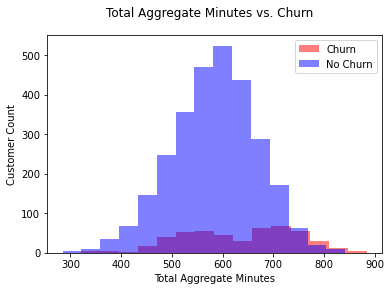

In [106]:
# Histogram for total_agg_minutes vs. churn

fig, ax = plt.subplots()

ax.hist(df_feature_engineered[df_feature_engineered["churn"]==True]["total_agg_minutes"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df_feature_engineered[df_feature_engineered["churn"]==False]["total_agg_minutes"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Aggregate Minutes")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Aggregate Minutes vs. Churn")
plt.savefig('TAM.jpg')
ax.legend();

As total aggregate minutes increase, churn starts to outpace no churn.

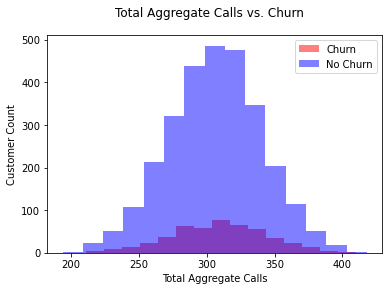

In [107]:
# Histogram for total_agg_calls vs. churn

fig, ax = plt.subplots()

ax.hist(df_feature_engineered[df_feature_engineered["churn"]==True]["total_agg_calls"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df_feature_engineered[df_feature_engineered["churn"]==False]["total_agg_calls"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Aggregate Calls")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Aggregate Calls vs. Churn")
plt.savefig('TAC.jpg')
ax.legend();

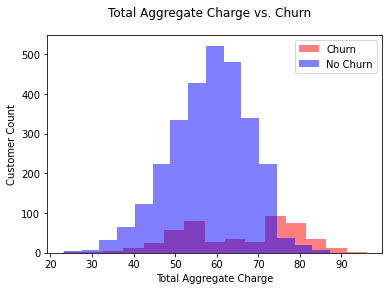

In [108]:
# Histogram for total_agg_charge vs. churn

fig, ax = plt.subplots()

ax.hist(df_feature_engineered[df_feature_engineered["churn"]==True]["total_agg_charge"], bins=15, alpha=0.5, color="red", label="Churn")
ax.hist(df_feature_engineered[df_feature_engineered["churn"]==False]["total_agg_charge"], bins=15, alpha=0.5, color="blue", label="No Churn")

ax.set_xlabel("Total Aggregate Charge")
ax.set_ylabel("Customer Count")

fig.suptitle("Total Aggregate Charge vs. Churn")
plt.savefig('TACHARGE.jpg')
ax.legend();

As total aggregate charge increases, churn starts to outpace no churn substantially.

# Data Preprocessing

Before building any models, pipelines and column transformers will be used to preprocess and transform the data. Using pipelines prevents data leakage and is efficient for model iteration. 

In [43]:
# Create mini pipelines for ColumnTransformer: 

# Numeric Pipeline: Standard scaling numerical data
num_pipe = Pipeline([('ss', StandardScaler())])

# Categorical Pipeline: One hot encoding categorical data
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Target Pipeline : Label encoding the target, 'churn'
target_pipe = Pipeline([('le', LabelEncoder())])

In [44]:
# Instatiating ColumnTransformer

CT = ColumnTransformer(transformers=[
    ('num_trans', num_pipe, selector(dtype_include = np.number)),
    ('cat_trans', cat_pipe, selector(dtype_include = object)),
    ('target_trans', target_pipe, selector(dtype_include =bool))
],remainder='passthrough')

# Building Dummy Model

In [45]:
# Start by splitting up the data into a training and test set 
# Assign variables to predictors(X) and target(y)

X = df.drop('churn', axis = 1)
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Creating a class to easily grab cross-validation scores and create visualziaitons for the models

class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

CV Results for `dummy` model:
            0.85674 ± 0.00149 accuracy
        


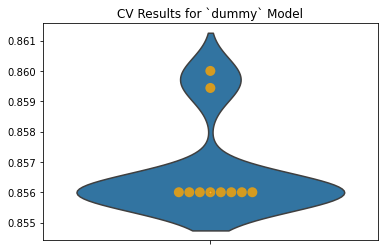

In [47]:
# Create dummy / baseline model

dummy_model = Pipeline([
    ('ct',CT),
    ('dummy',DummyClassifier(strategy='most_frequent'))
])

dummy_model_pipe =  ModelWithCV(dummy_model, model_name='dummy',X=X_train, y=y_train)

# Visualizing results with violin and swarm plot

fig,ax = plt.subplots()
dummy_model_pipe.plot_cv(ax=ax)

dummy_model_pipe.print_cv_summary()

Violin plot shows a graphic representation of the distribution of the target and the swarm plot shows the dots which represent the results of the cross-validation. Dummy model cross-val score is roughly 85% which is consistent with what we would have guessed by simply looking at the 'churn' distribution and picking the majority class. 

# First Simple Logistic Regression Model

CV Results for `fsm` model:
            0.85915 ± 0.01447 accuracy
        


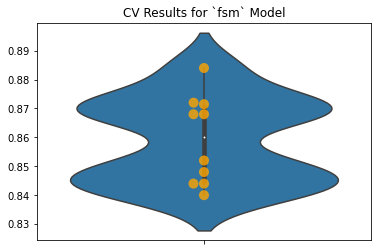

In [48]:
# Create first simple logistic regression model
logreg_fsm = Pipeline([
    ('ct',CT),
    ('logreg_fsm',LogisticRegression(random_state=42))
])

fsm_model_pipe =  ModelWithCV(logreg_fsm, model_name='fsm',X=X_train, y=y_train)

# Visualizing results with violin and swarm plot
fig,ax = plt.subplots()
fsm_model_pipe.plot_cv(ax=ax)

fsm_model_pipe.print_cv_summary()

Not much improvement over the dummy model

In [49]:
# Fit model and get test score
logreg_fsm.fit(X_train, y_train)
logreg_fsm.score(X_test, y_test)

0.8573141486810552

Slight overfitting as cv mean accuracy is better than test score accuracy

# Decision Tree Classifier Model

CV Results for `dtc_pipe` model:
            0.90957 ± 0.02498 accuracy
        


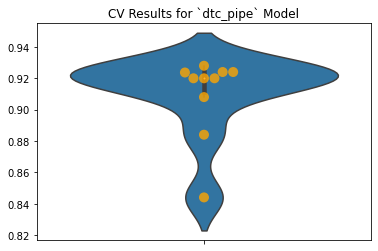

In [50]:
# Create Decision Tree Classifier Model
dtc_model_pipe = Pipeline([('ct', CT), ('dtc', DecisionTreeClassifier(random_state=42))])

dtc_pipe = ModelWithCV(model=dtc_model_pipe,
                          model_name='dtc_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot

fig, ax = plt.subplots()

dtc_pipe.plot_cv(ax=ax)

dtc_pipe.print_cv_summary()

Decision Tree improves on the first simple logistic regression model

In [51]:
# Fit model and get test score
dtc_model_pipe.fit(X_train, y_train)
dtc_model_pipe.score(X_test, y_test)

0.9256594724220624

Testing score is better than training score, no overfitting here.

# Random Forest Model

CV Results for `forest_pipe` model:
            0.93838 ± 0.00718 accuracy
        


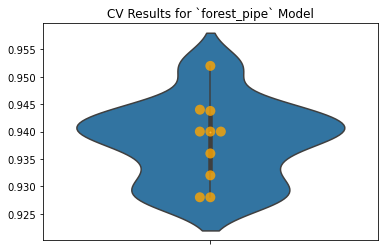

In [52]:
# Create Random Forest Model

rfc_model_pipe = Pipeline([('ct', CT), ('rfc', RandomForestClassifier(random_state=42))])

forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

forest_pipe.print_cv_summary()

Random forest model has a nice improvement over decision tree model

In [53]:
# Fit model and get test score
rfc_model_pipe.fit(X_train, y_train)
rfc_model_pipe.score(X_test, y_test)

0.9424460431654677

Testing score is better than the training score so no over fitting. This is also our best accuracy so far.

# Gradient Booster

CV Results for `gbc_pipe` model:
            0.94918 ± 0.01059 accuracy
        


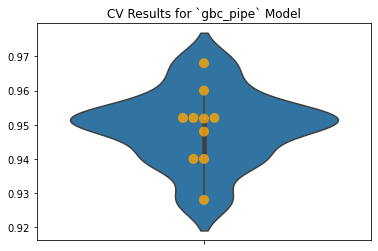

In [54]:
# Create Gradient Boosting Classifier Model
gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_pipe = ModelWithCV(model=gbc_model_pipe,
                          model_name='gbc_pipe',
                          X=X_train,
                          y=y_train)

# Visualizing results with violin and swarm plot

fig, ax = plt.subplots()

gbc_pipe.plot_cv(ax=ax)

gbc_pipe.print_cv_summary()

Gradient booster improves over the random forest model

In [55]:
# Fit model and get test score
gbc_model_pipe.fit(X_train, y_train)
gbc_model_pipe.score(X_test, y_test)

0.9496402877697842

Testing score is roughly equal to training score so no overfitting. This is the best model yet.

# Fine Tuning Top Two Models

Random Forest and Gradiest Boost are the top two models with an accuracy score of 94.24% and 94.96%, respectively. I will attempt to fine-tune and improve the scores of these two models using the resampling technique, SMOTE, as well as hyperparameter tuning via grid search.

# Smote

As I mentioned earlier, the Churn rate of 14.49% implies a class imbalance for the target variable, which could introduce bias into a predicitve model. I will now introduce SMOTE, a technique that oversamples the minority class, on our two best models thus far.

In [56]:
#Creating new IMBPipeline to include Smote for the Random Forest Classifier
imb_pipe_rfc= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('rfc',RandomForestClassifier(random_state=42)),
])

In [57]:
# fit model on train data
imb_pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88214F0>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88216D0>),
                                                 ('target_trans',
     

In [58]:
# train score accuracy; 1.0 is too good to be true
imb_pipe_rfc.score(X_train, y_train)

1.0

In [59]:
# test score accuracy
imb_pipe_rfc.score(X_test, y_test)

0.9364508393285371

Using Smote has decreased the accuracy on the Random Forest model.

In [60]:
#Smote for the Gradient Boost Classifier

imb_pipe_gbc= ImPipeline(steps=[
    ('ct',CT),
    ('sm',SMOTE(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
])

In [61]:
# fit on train data
imb_pipe_gbc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88214F0>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88216D0>),
                                                 ('target_trans',
     

In [62]:
# accuracy score on train data
imb_pipe_gbc.score(X_train, y_train)

0.957983193277311

In [63]:
# accuracy score on test data
imb_pipe_gbc.score(X_test, y_test)

0.9448441247002398

Using SMOTE did not have much affect on the Gradient Boost model test accuracy but did result in an increase for the train accuracy.

# Grid Search / Hyperparameter Tuning

I will now try to fine tune the top two models using gridsearch.

In [67]:
# Hyperparameter tuning Random Forest Classifier
parameters = {'rfc__criterion': ['gini', 'entropy'],
          'rfc__min_samples_leaf': [1, 5, 10],
          'sm__k_neighbors': [3, 5, 9]}

gs_rfc = GridSearchCV(estimator=imb_pipe_rfc,
                 param_grid=parameters,
                 cv=10, verbose=1)

In [71]:
# fit model on train data
gs_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.0min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_trans',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88214F0>),
                                                                        ('cat_trans',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                   

In [72]:
# finding the best parameters
gs_rfc.best_params_


{'rfc__criterion': 'entropy', 'rfc__min_samples_leaf': 1, 'sm__k_neighbors': 3}

In [73]:
# train accuracy score
gs_rfc.best_score_

0.9431759036144577

In [74]:
# test accuracy score
gs_rfc.best_estimator_.score(X_test, y_test)

0.9412470023980816

This is an improvement over Random Forest model with SMOTE only, but not over the simple Random Forest model.

In [75]:
# Best parameters discovered throuhg grid search for RFC:
rfc_best_param = ImPipeline(steps=[
    ('ct', CT),
    ('sm', SMOTE(k_neighbors=3, sampling_strategy='auto', random_state=42)),
    ('rfc_best',RandomForestClassifier(random_state=42, criterion='entropy', min_samples_leaf=1))
])

In [76]:
rfc_best_param.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88214F0>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88216D0>),
                                                 ('target_trans',
     

In [77]:
rfc_best_param.score(X_train, y_train)

1.0

In [78]:
rfc_best_param.score(X_test, y_test)


0.9412470023980816

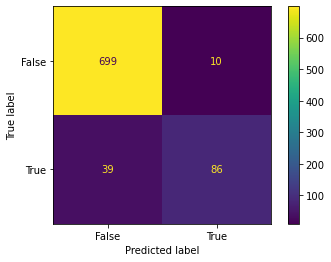

In [97]:
# Plot confusion matrix
plot_confusion_matrix(rfc_best_param, X_test, y_test);

In [98]:
# calculate predictions
y_hat_rfc = rfc_best_param.predict(X_test)

In [99]:
print(f"""
Tuned Random Forest accuracy on the test set is {round(accuracy_score(y_test, y_hat_rfc), 2)}. \n
Tuned Random Forest recall on the test set is {round(recall_score(y_test, y_hat_rfc), 2)} \n
Tuned Random Forest precision on the test set is {round(precision_score(y_test, y_hat_rfc), 2)} \n
Tuned Random Forest f1-score on the test is {round(f1_score(y_test, y_hat_rfc), 2)}.
""")


Tuned Random Forest accuracy on the test set is 0.94. 

Tuned Random Forest recall on the test set is 0.69 

Tuned Random Forest precision on the test set is 0.9 

Tuned Random Forest f1-score on the test is 0.78.



In [79]:
# Hyperparameter tuning Gradient Boosting Classifier
parameters = {
    "gbc__n_estimators":[5,50,250,500],
    "gbc__max_depth":[1,3,5,7,9],
    "gbc__criterion":['friedman_mse', 'squared_error'],
    "gbc__learning_rate":[0.01,0.1,1,10,100]
}

gs_gbc = GridSearchCV(estimator=imb_pipe_gbc,
                         param_grid=parameters,
                         cv=5,
                         verbose=1) 

In [87]:
# Commenting out for efficiency (Fitting this model took 90 minutes)
#gs_gbc.fit(X_train, y_train)

In [ ]:
# Commenting out becasue gs_gbc will not run with the above fitting commented out
#gs_gbc.best_params_
#gs_gbc.best_score_
#gs_gbc.best_estimator_.score(X_test, y_test)

In [83]:
# Best parameters discovered through grid search for GBC:
gbc_best_param = ImPipeline(steps=[
    ('ct', CT),
    ('sm', SMOTE(random_state=42)),
    ('gbc_best',GradientBoostingClassifier(random_state = 42, criterion = 'friedman_mse',
                                           learning_rate = 0.1, max_depth = 7, n_estimators = 500)) 
])

In [84]:
# fit on train data
gbc_best_param.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88214F0>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000145F88216D0>),
                                                 ('target_trans',
     

In [85]:
gbc_best_param.score(X_train, y_train)

1.0

In [86]:
# Scoring on test data
gbc_best_param.score(X_test, y_test)


0.9580335731414868

The tuned Gradient Boost model looks to be our best model yet, with an accuracy score of 95.80 % Let's use this model and measure some other key metrics.

# Final Model Evaluation

In [88]:
# assigning the best model to 'final model'
final_model = gbc_best_param

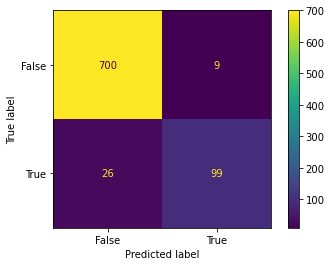

In [112]:
# Plot confusion matrix
plot_confusion_matrix(final_model, X_test, y_test);
plt.savefig('finalconfmatrix.jpg')

In [91]:
# calculate predictions
y_hat = final_model.predict(X_test)

In [92]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 2)}.
""")


Our final model's accuracy on the test set is 0.96. 

Our final model's recall on the test set is 0.79 

Our final model's precision on the test set is 0.92 

Our final model's f1-score on the test is 0.85.



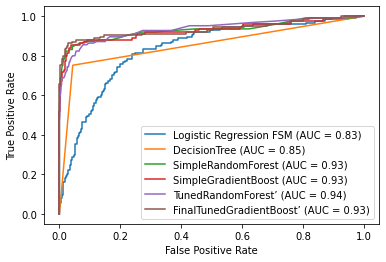

In [113]:
# PLot ROC Curves and look at AUC Scores
# AUC scores is a measurement of the ratio of the rate of True Positive to False postive, with a higher score being better.

fig, ax = plt.subplots()


plot_roc_curve(logreg_fsm, X_test, y_test, ax=ax, name='Logistic Regression FSM')
plot_roc_curve(dtc_model_pipe, X_test, y_test, ax=ax, name='DecisionTree')
plot_roc_curve(rfc_model_pipe, X_test, y_test, ax=ax, name='SimpleRandomForest')
plot_roc_curve(gbc_model_pipe, X_test, y_test, ax=ax, name='SimpleGradientBoost')
plot_roc_curve(rfc_best_param, X_test, y_test, ax=ax, name='TunedRandomForest’')
plot_roc_curve(final_model, X_test, y_test, ax=ax, name='FinalTunedGradientBoost’')

plt.savefig('rocauc.jpg')


 In determining which model was best, my goal was to use accuracy score on test data to narrow down the top two models.  Once I narrowed it down to the Random Forest and Gradiest Boost, which had test data accuracy scores of 94.24% and 94.96% respectively, I wanted to fine tune the models. Becasue of the imbalance in the target distribution, I wanted to use SMOTE as a method of oversampling the minority class. This dropped the Random Forest test accuracy score to 93.64%  and the Gradiest Boost score to 94.48%. I then used GridSearch on both models to determine which hyperparameters were most imporrtant. The result of this tuning brought the Random Forest accuracy score to 94.12% and the Gradient Boost accuracy score to 95.80%.

For my stakeholder, identifying future customers who may churn is criticial to their ability to target market and try to retain customers. For this reason, I think that accuracy is the most important metric becasue it measures the rate at which the model can correctly predict whether or not a customer will churn. Despite this, I did decide to look at other key metrics as well for added reassurance as to which model is best overall. ROC_AUC is a measurement of the ratio of the rate of True Positive to False postive, with a higher score being better. Gradient Boost had a score of 0.93 while Random Forest had a slightly better score of 0.94. Additional metrics I used include precision,  which measures what proportion of positive identifications was actually correct? Recall, which measures what proportion of actual positives was identified correctly? Finally, I measured F1 score, which is a combination of both precision and recall. The results for Gradient Boost are as follows: Recall: 79%, Precision: 92%, F1 Score: 85%. The results for Random Forest are as follows: Recall: 69%, Precision: 90%, F1 Score: 78%. When comparing these metric scores between the two top models, the Gradient Boost was superior in each category, giving me even more assurance that it is indeed the best model. When comparing the final model to the baseline model which had an accuracy score of about 86%, it's clear that this it is a major improvement and should be utilized in the future as a tool to effecetively predict customer churn. 

# Next Steps

Due to time restraints, I was unable to perform as much hyperparameter tuning as I would have liked. In the future, I would spend more time further tuning the model and also trying to better understand which features are most important. Additionally, I would like to collect more data and see how that might affect the efficacy of the model. 